# Linear regression classification 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_train = np.asarray(pd.read_csv("training_data.csv"))
y_train = np.asarray(pd.read_csv("training_label.csv"))
X_test = np.asarray(pd.read_csv("testing_data.csv"))
y_test = np.asarray(pd.read_csv("testing_label.csv"))

In [3]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]

In [4]:
# normalize data (Min-Max Normalization)

In [5]:
# def noramlization(data):
#     minVals = data.min(0)
#     maxVals = data.max(0)
#     ranges = maxVals - minVals
#     normData = np.zeros(np.shape(data))
#     m = data.shape[0]
#     normData = data - np.tile(minVals, (m, 1))
#     normData = normData/np.tile(ranges, (m, 1))
#     return normData

In [6]:
def z_score(x, axis):
    xr = np.rollaxis(x, axis=axis)
    xr -= np.mean(x, axis=axis)
    xr /= np.std(x, axis=axis)
    # print(x)
    return x

In [7]:
X_train = z_score(X_train,0)
X_test = z_score(X_test,0)

In [20]:
# First let's try the simple least square problem  

# Least square solution 

In [8]:
n_train = len(X_train)
k_fold = 5
id_train = [[]] * k_fold
id_val = [[]] * k_fold

for m in range(k_fold):
    id_val[m] = range(m, n_train, k_fold) # Indices of k_fold validation sets.
    id_train[m] = np.setdiff1d(range(n_train), id_val[m])

In [9]:
Err_rate = []
Sq_err = []
W_less = 100

In [10]:
for m in range(k_fold):
    print("\n iteration", m)
    X_train_r = X_train[id_train[m]]
    y_train_r = y_train[id_train[m]]
    X_val_r = X_train[id_val[m]]
    y_val_r = y_train[id_val[m]]     
 #   print(X_train_r.shape, y_train_r.shape, X_val_r.shape, y_val_r.shape)
    
    #validation
    W_least = np.linalg.inv(X_train_r.T@X_train_r)@X_train_r.T@y_train_r
    y_hat = np.sign(X_val_r @ W_least)
    error_vec = [0 if k[0]==k[1] else 1 for k in np.hstack((y_hat, y_val_r))]
    err_rate = sum(error_vec)/len(y_val_r)
                
    Sq_err_vec = [ (it[0]-it[1])**2 for it in np.hstack((y_hat, y_val_r))]
    sq_err = sum(Sq_err_vec)/len(y_val_r)
    
    Err_rate.append(err_rate)
    Sq_err.append(sq_err)
    
    if err_rate < W_less:
        W_less = err_rate
        best_w = W_least
    
    print("Validation error rate:", err_rate*100,"%")
    print("Validation mean square error:", sq_err)


 iteration 0
Validation error rate: 41.0958904109589 %
Validation mean square error: 1.643835616438356

 iteration 1
Validation error rate: 50.68493150684932 %
Validation mean square error: 2.0273972602739727

 iteration 2
Validation error rate: 48.61111111111111 %
Validation mean square error: 1.9444444444444444

 iteration 3
Validation error rate: 52.77777777777778 %
Validation mean square error: 2.111111111111111

 iteration 4
Validation error rate: 48.61111111111111 %
Validation mean square error: 1.9444444444444444


In [11]:
print("The Least square solution result:\n")
print("The error rate of each validation:\n",Err_rate)
print("\n")
print("The mean squared error of each validation:\n",Sq_err)
print("\n")
print("The best weighted values:\n",best_w)
print("\n")
print("The average number of misclassifications rate:\n",sum(Err_rate)/len(Err_rate))
print("\n")
print("The mean squared error:\n",sum(Sq_err)/len(Sq_err))

The Least square solution result:

The error rate of each validation:
 [0.410958904109589, 0.5068493150684932, 0.4861111111111111, 0.5277777777777778, 0.4861111111111111]


The mean squared error of each validation:
 [1.643835616438356, 2.0273972602739727, 1.9444444444444444, 2.111111111111111, 1.9444444444444444]


The best weighted values:
 [[-0.01896881]
 [ 0.0626032 ]
 [ 0.17975799]
 [-0.04016948]
 [ 0.03746964]
 [-0.00667443]
 [-0.09270972]
 [-0.00135062]
 [ 0.07833817]
 [-0.06211381]
 [ 0.02662307]
 [ 0.05475716]]


The average number of misclassifications rate:
 0.48356164383561645


The mean squared error:
 1.9342465753424658


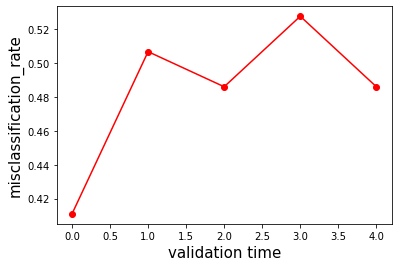

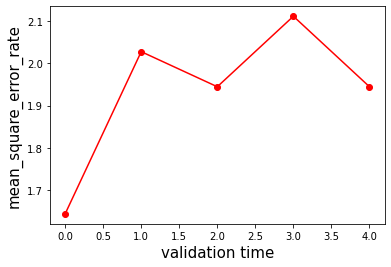

In [12]:
plt.plot(Err_rate,"ro-")
plt.xlabel("validation time",fontsize = 15)
plt.ylabel("misclassification_rate", fontsize = 15)
plt.show()

plt.figure()
plt.plot(Sq_err,"ro-")
plt.xlabel("validation time",fontsize = 15)
plt.ylabel("mean_square_error_rate", fontsize = 15)
plt.show()

In [13]:
# Testing results
y_hat3 = np.sign(X_test @ best_w)
error_vec3 = [0 if it[0]==it[1] else 1 for it in np.hstack((y_hat3, y_test))]
err_rate3 = sum(error_vec3)/len(y_test)

Sq_err_vec3 = [ (it[0]-it[1])**2 for it in np.hstack((y_hat3, y_test))]
sq_err3 = sum(Sq_err_vec3)/len(y_test)

print("testing_misclassification_rate:",err_rate3)
print("mean_square_error_rate",sq_err3)

testing_misclassification_rate: 0.535483870967742
mean_square_error_rate 2.141935483870968


# Ridge regression 

In [14]:
Err_rate = []
Sq_err = []
Be_lam = []

In [15]:
lam_vals = np.logspace(-10,1, num=30)
print("lambda:",lam_vals)

lambda: [1.00000000e-10 2.39502662e-10 5.73615251e-10 1.37382380e-09
 3.29034456e-09 7.88046282e-09 1.88739182e-08 4.52035366e-08
 1.08263673e-07 2.59294380e-07 6.21016942e-07 1.48735211e-06
 3.56224789e-06 8.53167852e-06 2.04335972e-05 4.89390092e-05
 1.17210230e-04 2.80721620e-04 6.72335754e-04 1.61026203e-03
 3.85662042e-03 9.23670857e-03 2.21221629e-02 5.29831691e-02
 1.26896100e-01 3.03919538e-01 7.27895384e-01 1.74332882e+00
 4.17531894e+00 1.00000000e+01]


In [16]:
for m in range(k_fold):
    print("\n iteration", m)
    X_train_r = X_train[id_train[m]]
    y_train_r = y_train[id_train[m]]
    X_val_r = X_train[id_val[m]]
    y_val_r = y_train[id_val[m]]     
#     print(X_train_r.shape, y_train_r.shape, X_val_r.shape, y_val_r.shape)
    
    #select lambda
    Error_rate_low = 100
    for i in range(len(lam_vals)):
        W_ridge = np.linalg.inv(X_train_r.T@X_train_r+lam_vals[i]*np.identity(X_train_r.shape[1]))@ X_train_r.T @y_train_r
        y_hat = np.sign(X_val_r @ W_ridge)
        lam_error_vec = [0 if k[0]==k[1] else 1 for k in np.hstack((y_hat, y_val_r))]
        lam_err_rate = sum(lam_error_vec)/len(y_val_r)
        
        if lam_err_rate < Error_rate_low:
            Error_rate_low = lam_err_rate
            best_lam = lam_vals[i]
            best_w = W_ridge
            
    #validation
    y_hat2 = np.sign(X_val_r @ best_w)
    error_vec = [0 if it1[0]==it1[1] else 1 for it1 in np.hstack((y_hat2, y_val_r))]
    err_rate = sum(error_vec)/len(y_val_r)
    
    Sq_err_vec = [ (it2[0]-it2[1])**2 for it2 in np.hstack((y_hat2, y_val_r))]
    sq_err = sum(Sq_err_vec)/len(y_val_r)
    
    Err_rate.append(err_rate)
    Sq_err.append(sq_err)
    Be_lam.append(best_lam)
    
    print("Validation error rate:", err_rate*100,"%")
    print("Validation mean square error:", sq_err)


 iteration 0
Validation error rate: 39.726027397260275 %
Validation mean square error: 1.5890410958904109

 iteration 1
Validation error rate: 46.57534246575342 %
Validation mean square error: 1.8630136986301369

 iteration 2
Validation error rate: 47.22222222222222 %
Validation mean square error: 1.8888888888888888

 iteration 3
Validation error rate: 52.77777777777778 %
Validation mean square error: 2.111111111111111

 iteration 4
Validation error rate: 45.83333333333333 %
Validation mean square error: 1.8333333333333333


In [17]:
print("The Ridge regression result:\n")
print("The error rate of each validation:\n",Err_rate)
print("\n")
print("The mean squared error of each validation:\n",Sq_err)
print("\n")
print("The best lambda value of each validation:\n",Be_lam)
print("\n")
print("The best weighted values:\n",best_w)
print("\n")
print("The average number of misclassifications rate:\n",sum(Err_rate)/len(Err_rate))
print("\n")
print("The mean squared error:\n",sum(Sq_err)/len(Sq_err))

The Ridge regression result:

The error rate of each validation:
 [0.3972602739726027, 0.4657534246575342, 0.4722222222222222, 0.5277777777777778, 0.4583333333333333]


The mean squared error of each validation:
 [1.5890410958904109, 1.8630136986301369, 1.8888888888888888, 2.111111111111111, 1.8333333333333333]


The best lambda value of each validation:
 [10.0, 10.0, 1.7433288221999872, 1e-10, 10.0]


The best weighted values:
 [[ 0.05573183]
 [-0.02220652]
 [ 0.19313862]
 [ 0.02413075]
 [ 0.04119367]
 [-0.00475395]
 [ 0.00037664]
 [-0.01903349]
 [-0.04214778]
 [-0.10694655]
 [ 0.0020995 ]
 [ 0.04698217]]


The average number of misclassifications rate:
 0.4642694063926941


The mean squared error:
 1.8570776255707764


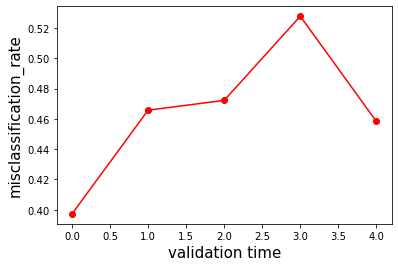

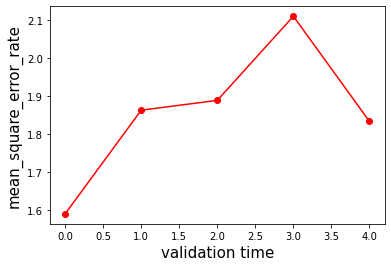

In [18]:
plt.plot(Err_rate,"ro-")
plt.xlabel("validation time",fontsize = 15)
plt.ylabel("misclassification_rate", fontsize = 15)
plt.show()

plt.figure()
plt.plot(Sq_err,"ro-")
plt.xlabel("validation time",fontsize = 15)
plt.ylabel("mean_square_error_rate", fontsize = 15)
plt.show()

In [20]:
# Testing results
y_hat3 = np.sign(X_test @ best_w)
error_vec3 = [0 if it[0]==it[1] else 1 for it in np.hstack((y_hat3, y_test))]
err_rate3 = sum(error_vec3)/len(y_test)

Sq_err_vec3 = [ (it[0]-it[1])**2 for it in np.hstack((y_hat3, y_test))]
sq_err3 = sum(Sq_err_vec3)/len(y_test)

print("testing_misclassification_rate:",err_rate3)
print("mean_square_error_rate",sq_err3)

testing_misclassification_rate: 0.5161290322580645
mean_square_error_rate 2.064516129032258


# LASSO Regression 

In [21]:
def ista_solve_hot( A, d, la_array ):
    # ista_solve_hot: Iterative soft-thresholding for multiple values of
    # lambda with hot start for each case - the converged value for the previous
    # value of lambda is used as an initial condition for the current lambda.
    # this function solves the minimization problem
    # Minimize |Ax-d|_2^2 + lambda*|x|_1 (Lasso regression)
    # using iterative soft-thresholding.
    max_iter = 10**4
    tol = 10**(-3)
    tau = 1/np.linalg.norm(A,2)**2
    n = A.shape[1]
    w = np.zeros((n,1))
    num_lam = len(la_array)
    X = np.zeros((n, num_lam))
    for i, each_lambda in enumerate(la_array):
        for j in range(max_iter):
            z = w - tau*(A.T@(A@w-d))
            w_old = w
            w = np.sign(z) * np.clip(np.abs(z)-tau*each_lambda/2, 0, np.inf)
            X[:, i:i+1] = w
            if np.linalg.norm(w - w_old) < tol:
                break
    return X

In [22]:
Err_rate = []
Sq_err = []
Be_lam = []

lam_vals = np.logspace(-10,1, num=30)
print("lambda:",lam_vals)

lambda: [1.00000000e-10 2.39502662e-10 5.73615251e-10 1.37382380e-09
 3.29034456e-09 7.88046282e-09 1.88739182e-08 4.52035366e-08
 1.08263673e-07 2.59294380e-07 6.21016942e-07 1.48735211e-06
 3.56224789e-06 8.53167852e-06 2.04335972e-05 4.89390092e-05
 1.17210230e-04 2.80721620e-04 6.72335754e-04 1.61026203e-03
 3.85662042e-03 9.23670857e-03 2.21221629e-02 5.29831691e-02
 1.26896100e-01 3.03919538e-01 7.27895384e-01 1.74332882e+00
 4.17531894e+00 1.00000000e+01]


In [23]:
for m in range(k_fold):
    print("\n iteration", m)
    X_train_r = X_train[id_train[m]]
    y_train_r = y_train[id_train[m]]
    X_val_r = X_train[id_val[m]]
    y_val_r = y_train[id_val[m]]     
#     print(X_train_r.shape, y_train_r.shape, X_val_r.shape, y_val_r.shape)
    
    #select lambda
    W_lasso = ista_solve_hot(X_train_r,y_train_r,lam_vals)
    Error_rate_low = 100
    for i in range(W_lasso.shape[1]):
        y_hat = np.sign(X_val_r @ W_lasso[:,i]).reshape(y_val_r.shape[0],1)   
        lam_error_vec = [0 if k[0]==k[1] else 1 for k in np.hstack((y_hat, y_val_r))]
        lam_err_rate = sum(lam_error_vec)/len(y_val_r)
        
        if lam_err_rate < Error_rate_low:
            Error_rate_low = lam_err_rate
            best_lam = lam_vals[i]
            best_w = W_lasso[:,i]
            
    #validation
    y_hat2 = np.sign(X_val_r @ best_w).reshape(y_val_r.shape[0],1)
    error_vec = [0 if it1[0]==it1[1] else 1 for it1 in np.hstack((y_hat2, y_val_r))]
    err_rate = sum(error_vec)/len(y_val_r)
    
    Sq_err_vec = [ (it2[0]-it2[1])**2 for it2 in np.hstack((y_hat2, y_val_r))]
    sq_err = sum(Sq_err_vec)/len(y_val_r)
    
    Err_rate.append(err_rate)
    Sq_err.append(sq_err)
    Be_lam.append(best_lam)
    
    print("Validation error rate:", err_rate*100,"%")
    print("Validation mean square error:", sq_err)


 iteration 0
Validation error rate: 39.726027397260275 %
Validation mean square error: 1.5890410958904109

 iteration 1
Validation error rate: 39.726027397260275 %
Validation mean square error: 1.5890410958904109

 iteration 2
Validation error rate: 47.22222222222222 %
Validation mean square error: 1.8888888888888888

 iteration 3
Validation error rate: 50.0 %
Validation mean square error: 2.0

 iteration 4
Validation error rate: 44.44444444444444 %
Validation mean square error: 1.7777777777777777


In [24]:
print("The LASSO regression result:\n")
print("The error rate of each validation:\n",Err_rate)
print("\n")
print("The mean squared error of each validation:\n",Sq_err)
print("\n")
print("The best lambda value of each validation:\n",Be_lam)
print("\n")
print("The best weighted values:\n",best_w)
print("\n")
print("The average number of misclassifications rate:\n",sum(Err_rate)/len(Err_rate))
print("\n")
print("The mean squared error:\n",sum(Sq_err)/len(Sq_err))

The LASSO regression result:

The error rate of each validation:
 [0.3972602739726027, 0.3972602739726027, 0.4722222222222222, 0.5, 0.4444444444444444]


The mean squared error of each validation:
 [1.5890410958904109, 1.5890410958904109, 1.8888888888888888, 2.0, 1.7777777777777777]


The best lambda value of each validation:
 [1e-10, 10.0, 1e-10, 4.175318936560392, 10.0]


The best weighted values:
 [ 2.95496140e-02 -0.00000000e+00  1.75855574e-01  1.19229480e-04
  1.61456963e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -1.11147256e-02 -8.36020869e-02  0.00000000e+00  2.94824871e-02]


The average number of misclassifications rate:
 0.44223744292237444


The mean squared error:
 1.7689497716894977


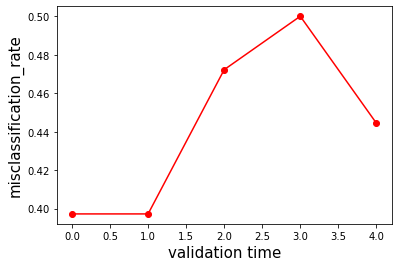

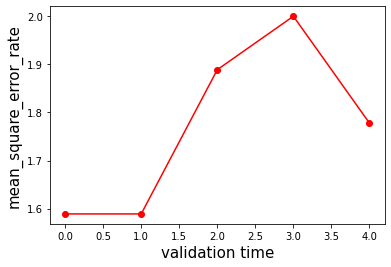

In [25]:
plt.plot(Err_rate,"ro-")
plt.xlabel("validation time",fontsize = 15)
plt.ylabel("misclassification_rate", fontsize = 15)
plt.show()

plt.figure()
plt.plot(Sq_err,"ro-")
plt.xlabel("validation time",fontsize = 15)
plt.ylabel("mean_square_error_rate", fontsize = 15)
plt.show()

In [26]:
# Testing results
y_hat3 = np.sign(X_test @ best_w).reshape(y_test.shape[0],1)
error_vec3 = [0 if it[0]==it[1] else 1 for it in np.hstack((y_hat3, y_test))]
err_rate3 = sum(error_vec3)/len(y_test)

Sq_err_vec3 = [ (it[0]-it[1])**2 for it in np.hstack((y_hat3, y_test))]
sq_err3 = sum(Sq_err_vec3)/len(y_test)

print("testing_misclassification_rate:",err_rate3)
print("mean_square_error_rate",sq_err3)

testing_misclassification_rate: 0.5290322580645161
mean_square_error_rate 2.1161290322580646


# Truncated SVD

In [27]:
Err_rate = []
Sq_err = []
Be_rank = []

In [28]:
for m in range(k_fold):
    print("\n iteration", m)
    X_train_r = X_train[id_train[m]]
    y_train_r = y_train[id_train[m]]
    X_val_r = X_train[id_val[m]]
    y_val_r = y_train[id_val[m]]     
#     print(X_train_r.shape, y_train_r.shape, X_val_r.shape, y_val_r.shape)
    
    #select lambda
    U,s,VT = np.linalg.svd(X_train_r,full_matrices=False)
    
    Error_rate_low = 100
    for r in range(len(s)):
        W_SVD = VT.T[:,:(r+1)]@ np.diag(1/s[:(r+1)])@ U.T[:(r+1),:] @ y_train_r
        
        y_hat = np.sign(X_val_r @ W_SVD).reshape(y_val_r.shape[0],1)   
        lam_error_vec = [0 if k[0]==k[1] else 1 for k in np.hstack((y_hat, y_val_r))]
        lam_err_rate = sum(lam_error_vec)/len(y_val_r)
        
        if lam_err_rate < Error_rate_low:
            Error_rate_low = lam_err_rate
            best_rank = r+1
            best_w = W_SVD
            
    #validation
    y_hat2 = np.sign(X_val_r @ best_w)
    error_vec = [0 if it1[0]==it1[1] else 1 for it1 in np.hstack((y_hat, y_val_r))]
    err_rate = sum(error_vec)/len(y_val_r)
    
    Sq_err_vec = [ (it2[0]-it2[1])**2 for it2 in np.hstack((y_hat, y_val_r))]
    sq_err = sum(Sq_err_vec)/len(y_val_r)
    
    Err_rate.append(err_rate)
    Sq_err.append(sq_err)
    Be_rank.append(best_rank)
    
    print("Validation error rate:", err_rate*100,"%")
    print("Validation mean square error:", sq_err)


 iteration 0
Validation error rate: 41.0958904109589 %
Validation mean square error: 1.643835616438356

 iteration 1
Validation error rate: 50.68493150684932 %
Validation mean square error: 2.0273972602739727

 iteration 2
Validation error rate: 48.61111111111111 %
Validation mean square error: 1.9444444444444444

 iteration 3
Validation error rate: 52.77777777777778 %
Validation mean square error: 2.111111111111111

 iteration 4
Validation error rate: 48.61111111111111 %
Validation mean square error: 1.9444444444444444


In [29]:
print("The Truncated SVD result:\n")
print("The error rate of each validation:\n",Err_rate)
print("\n")
print("The mean squared error of each validation:\n",Sq_err)
print("\n")
print("The best weighted values:\n",best_w)
print("\n")
print("The best rank_approximation of each validation:\n",Be_rank)
print("\n")
print("The average number of misclassifications rate:\n",sum(Err_rate)/len(Err_rate))
print("\n")
print("The mean squared error:\n",sum(Sq_err)/len(Sq_err))

The Truncated SVD result:

The error rate of each validation:
 [0.410958904109589, 0.5068493150684932, 0.4861111111111111, 0.5277777777777778, 0.4861111111111111]


The mean squared error of each validation:
 [1.643835616438356, 2.0273972602739727, 1.9444444444444444, 2.111111111111111, 1.9444444444444444]


The best weighted values:
 [[ 0.0191759 ]
 [ 0.01884732]
 [ 0.10264142]
 [-0.01507769]
 [-0.01062672]
 [-0.00214061]
 [ 0.06172272]
 [-0.02085422]
 [ 0.03797311]
 [-0.08628553]
 [ 0.06698872]
 [ 0.03219334]]


The best rank_approximation of each validation:
 [2, 2, 1, 2, 7]


The average number of misclassifications rate:
 0.48356164383561645


The mean squared error:
 1.9342465753424658


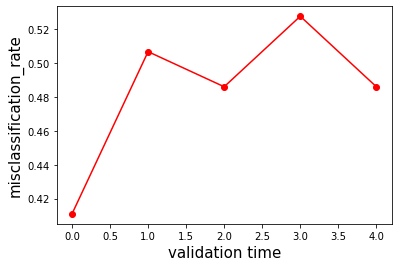

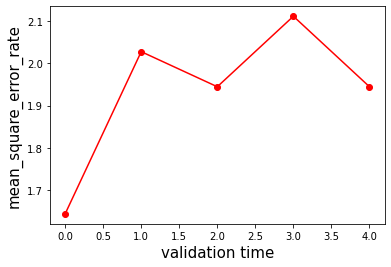

In [30]:
plt.plot(Err_rate,"ro-")
plt.xlabel("validation time",fontsize = 15)
plt.ylabel("misclassification_rate", fontsize = 15)
plt.show()

plt.figure()
plt.plot(Sq_err,"ro-")
plt.xlabel("validation time",fontsize = 15)
plt.ylabel("mean_square_error_rate", fontsize = 15)
plt.show()

In [31]:
# Testing results
y_hat3 = np.sign(X_test @ best_w).reshape(y_test.shape[0],1)
error_vec3 = [0 if it[0]==it[1] else 1 for it in np.hstack((y_hat3, y_test))]
err_rate3 = sum(error_vec3)/len(y_test)

Sq_err_vec3 = [ (it[0]-it[1])**2 for it in np.hstack((y_hat3, y_test))]
sq_err3 = sum(Sq_err_vec3)/len(y_test)

print("testing_misclassification_rate:",err_rate3)
print("mean_square_error_rate",sq_err3)

testing_misclassification_rate: 0.5225806451612903
mean_square_error_rate 2.0903225806451613


As we can see after useing several linear regression approaches, the prediction result did not seems good, so let's do a feature selection to see whether if we can get good results.  

# Feature selection results:

In [43]:
features_selected = ["month","FFMC","DC","temp","RH","rain"]

In [44]:
X_train1 = pd.read_csv("training_data.csv")[features_selected]
y_train1 = pd.read_csv("training_label.csv")
X_test1 = pd.read_csv("testing_data.csv")[features_selected]
y_test1 = pd.read_csv("testing_label.csv")

In [45]:
X_train1

,month,FFMC,DC,temp,RH,rain
0,7,94.2,442.9,23.0,36,0.0
1,9,92.4,668.0,19.0,34,0.0
2,2,86.9,18.7,8.8,35,0.0
3,5,85.1,113.8,11.3,94,0.0
4,9,92.4,668.0,19.6,33,0.0
...,...,...,...,...,...,...
357,8,94.9,587.1,23.4,40,0.0
358,9,92.5,674.4,18.2,46,0.0
359,3,91.4,74.3,18.2,29,0.0
360,3,91.2,97.8,15.8,27,0.0


In [46]:
X_tr1 = np.asarray(X_train1)
y_tr1 = np.asarray(y_train1)
X_te1 = np.asarray(X_test1)
y_te1 = np.asarray(y_test1)

In [47]:
X_tr1 = z_score(X_tr1,0)
X_te1 = z_score(X_te1,0)

In [48]:
Err_rate = []
Sq_err = []
Be_lam = []

lam_vals = np.logspace(-10,1, num=30)
print("lambda:",lam_vals)

lambda: [1.00000000e-10 2.39502662e-10 5.73615251e-10 1.37382380e-09
 3.29034456e-09 7.88046282e-09 1.88739182e-08 4.52035366e-08
 1.08263673e-07 2.59294380e-07 6.21016942e-07 1.48735211e-06
 3.56224789e-06 8.53167852e-06 2.04335972e-05 4.89390092e-05
 1.17210230e-04 2.80721620e-04 6.72335754e-04 1.61026203e-03
 3.85662042e-03 9.23670857e-03 2.21221629e-02 5.29831691e-02
 1.26896100e-01 3.03919538e-01 7.27895384e-01 1.74332882e+00
 4.17531894e+00 1.00000000e+01]


In [49]:
for m in range(k_fold):
    print("\n iteration", m)
    X_train_r = X_tr1[id_train[m]]
    y_train_r = y_tr1[id_train[m]]
    X_val_r = X_tr1[id_val[m]]
    y_val_r = y_tr1[id_val[m]]     
#     print(X_train_r.shape, y_train_r.shape, X_val_r.shape, y_val_r.shape)
    
    #select lambda
    Error_rate_low = 100
    for i in range(len(lam_vals)):
        W_ridge = np.linalg.inv(X_train_r.T@X_train_r+lam_vals[i]*np.identity(X_train_r.shape[1]))@ X_train_r.T @y_train_r
        y_hat = np.sign(X_val_r @ W_ridge)
        lam_error_vec = [0 if k[0]==k[1] else 1 for k in np.hstack((y_hat, y_val_r))]
        lam_err_rate = sum(lam_error_vec)/len(y_val_r)
        
        if lam_err_rate < Error_rate_low:
            Error_rate_low = lam_err_rate
            best_lam = lam_vals[i]
            best_w = W_ridge
            
    #validation
    y_hat2 = np.sign(X_val_r @ best_w)
    error_vec = [0 if it1[0]==it1[1] else 1 for it1 in np.hstack((y_hat2, y_val_r))]
    err_rate = sum(error_vec)/len(y_val_r)
    
    Sq_err_vec = [ (it2[0]-it2[1])**2 for it2 in np.hstack((y_hat2, y_val_r))]
    sq_err = sum(Sq_err_vec)/len(y_val_r)
    
    Err_rate.append(err_rate)
    Sq_err.append(sq_err)
    Be_lam.append(best_lam)
    
    print("Validation error rate:", err_rate*100,"%")
    print("Validation mean square error:", sq_err)


 iteration 0
Validation error rate: 49.31506849315068 %
Validation mean square error: 1.9726027397260273

 iteration 1
Validation error rate: 39.726027397260275 %
Validation mean square error: 1.5890410958904109

 iteration 2
Validation error rate: 45.83333333333333 %
Validation mean square error: 1.8333333333333333

 iteration 3
Validation error rate: 52.77777777777778 %
Validation mean square error: 2.111111111111111

 iteration 4
Validation error rate: 50.0 %
Validation mean square error: 2.0


In [50]:
print("The Ridge regression of selected features result:\n")
print("The error rate of each validation:\n",Err_rate)
print("\n")
print("The mean squared error of each validation:\n",Sq_err)
print("\n")
print("The best lambda value of each validation:\n",Be_lam)
print("\n")
print("The best weighted values:\n",best_w)
print("\n")
print("The average number of misclassifications rate:\n",sum(Err_rate)/len(Err_rate))
print("\n")
print("The mean squared error:\n",sum(Sq_err)/len(Sq_err))

The Ridge regression of selected features result:

The error rate of each validation:
 [0.4931506849315068, 0.3972602739726027, 0.4583333333333333, 0.5277777777777778, 0.5]


The mean squared error of each validation:
 [1.9726027397260273, 1.5890410958904109, 1.8333333333333333, 2.111111111111111, 2.0]


The best lambda value of each validation:
 [4.175318936560392, 10.0, 1e-10, 4.175318936560392, 1e-10]


The best weighted values:
 [[ 0.21118849]
 [ 0.03479363]
 [-0.02236005]
 [-0.0492854 ]
 [-0.10500673]
 [ 0.04963009]]


The average number of misclassifications rate:
 0.47530441400304413


The mean squared error:
 1.9012176560121765


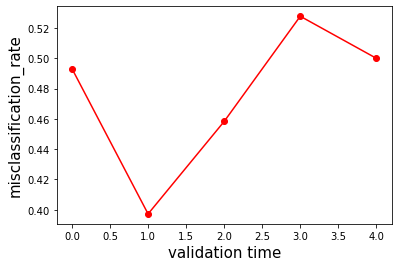

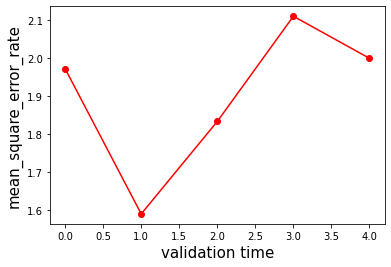

In [51]:
plt.plot(Err_rate,"ro-")
plt.xlabel("validation time",fontsize = 15)
plt.ylabel("misclassification_rate", fontsize = 15)
plt.show()

plt.figure()
plt.plot(Sq_err,"ro-")
plt.xlabel("validation time",fontsize = 15)
plt.ylabel("mean_square_error_rate", fontsize = 15)
plt.show()

In [52]:
# Testing results
y_hat3 = np.sign(X_test1 @ best_w)
error_vec3 = [0 if it[0]==it[1] else 1 for it in np.hstack((y_hat3, y_test1))]
err_rate3 = sum(error_vec3)/len(y_test1)

Sq_err_vec3 = [ (it[0]-it[1])**2 for it in np.hstack((y_hat3, y_test1))]
sq_err3 = sum(Sq_err_vec3)/len(y_test1)

print("testing_misclassification_rate:",err_rate3)
print("mean_square_error_rate",sq_err3)

testing_misclassification_rate: 0.4645161290322581
mean_square_error_rate 1.8580645161290323
